# Independence of Ideology for US Supreme Court Justices
Written paper to follow

__Credits__<br>
Supreme Court Justice Database: http://epstein.wustl.edu/research/justicesdata.html <br>
Supreme Court Database: http://scdb.wustl.edu/data.php

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

## 1) Descriptive Statistics

In [34]:
jd = pd.read_excel('justicesdata_edited.xlsx')

jd_main = ['birth', 'famses','famjud', 'parnom']
jd_cont = ['race', 'gender', 'lawschn']
jd_ideo = ['ideo']
jd_votes = ['percrim', 'percr', 'perfir', 'perunn',
            'perecon', 'perfed', 'perftax']

In [3]:
# All categorical so only mean ideology is useful
jd_desc = jd.describe().T
display(jd_desc)

,count,mean,std,min,25%,50%,75%,max
yrnom,113.0,1896.477876,64.512471,1789.000000,1845.000000,1902.000000,1946.000000,2017.000000
birth,113.0,1818.584071,65.531716,1700.000000,1750.000000,1800.000000,1850.000000,1950.000000
famses,113.0,2.345133,0.832058,1.000000,2.000000,3.000000,3.000000,3.000000
famjud,113.0,1.221239,0.416930,1.000000,1.000000,1.000000,1.000000,2.000000
race,113.0,1.026549,0.161476,1.000000,1.000000,1.000000,1.000000,2.000000
gender,113.0,1.035398,0.185607,1.000000,1.000000,1.000000,1.000000,2.000000
lawschn,113.0,1.389381,0.489782,1.000000,1.000000,1.000000,2.000000,2.000000
militwar,113.0,1.663717,0.474541,1.000000,1.000000,2.000000,2.000000,2.000000
agenom,113.0,52.964602,7.003735,32.000000,49.000000,54.000000,57.000000,68.000000
parnom,113.0,1.548673,0.626657,1.000000,1.000000,1.000000,2.000000,3.000000


### Grouped Descriptive Statistics

In [139]:
jd_birth = jd.groupby(['birth'])['birth','ideo'].count()
jd_birth['mean_ideo'] = jd.groupby('birth')['ideo'].mean()
jd_birth['count_p'] = jd_birth.birth / jd_birth.birth.sum()
display(jd_birth)

jd_famses = jd.groupby(['famses'])['famses', 'ideo'].count()
jd_famses['mean_ideo'] = jd.groupby('famses')['ideo'].mean()
jd_famses['count_p'] = jd_famses.famses / jd_famses.famses.sum()
display(jd_famses)

jd_parnom = jd.groupby(['parnom'])['parnom','ideo'].count()
jd_parnom['mean_ideo'] = jd.groupby('parnom')['ideo'].mean()
jd_parnom['count_p'] = jd_parnom.parnom / jd_parnom.parnom.sum()
display(jd_parnom)

jd_famjud = jd.groupby(['famjud'])['famjud','ideo'].count()
jd_famjud['mean_ideo'] = jd.groupby('famjud')['ideo'].mean()
jd_famjud['count_p'] = jd_famjud.famjud / jd_famjud.famjud.sum()
display(jd_famjud)

jd_lawsch = jd.groupby(['lawschn'])['lawschn','ideo'].count()
jd_lawsch['mean_ideo'] = jd.groupby('lawschn')['ideo'].mean()
jd_lawsch['count_p'] = jd_lawsch.lawschn / jd_lawsch.lawschn.sum()
display(jd_lawsch)

jd_gender = jd.groupby(['gender'])['gender','ideo'].count()
jd_gender['mean_ideo'] = jd.groupby('gender')['ideo'].mean()
jd_gender['count_p'] = jd_gender.gender / jd_gender.gender.sum()
display(jd_gender)

jd_race = jd.groupby(['race'])['race','ideo'].count()
jd_race['mean_ideo'] = jd.groupby('race')['ideo'].mean()
jd_race['count_p'] = jd_race.race / jd_race.race.sum()
display(jd_race)

,birth,ideo,mean_ideo,count_p
birth,,,,
1700,9,0,NaN,0.079646
1750,22,0,NaN,0.194690
1800,29,0,NaN,0.256637
1850,29,15,0.700000,0.256637
1900,19,19,0.453158,0.168142
1950,5,5,0.368000,0.044248


,famses,ideo,mean_ideo,count_p
famses,,,,
1,26,14,0.651786,0.230088
2,22,12,0.525000,0.194690
3,65,13,0.425000,0.575221


,parnom,ideo,mean_ideo,count_p
parnom,,,,
1,59,21,0.732143,0.522124
2,46,18,0.309722,0.407080
3,8,0,NaN,0.070796


,famjud,ideo,mean_ideo,count_p
famjud,,,,
1,88,37,0.522297,0.778761
2,25,2,0.812500,0.221239


,lawschn,ideo,mean_ideo,count_p
lawschn,,,,
1,69,38,0.542632,0.610619
2,44,1,0.330000,0.389381


,gender,ideo,mean_ideo,count_p
gender,,,,
1,109,35,0.524143,0.964602
2,4,4,0.651250,0.035398


,race,ideo,mean_ideo,count_p
race,,,,
1,110,36,0.528056,0.973451
2,3,3,0.646667,0.026549


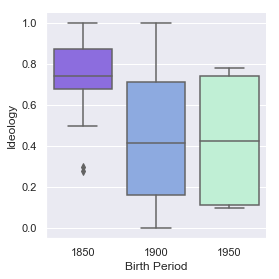

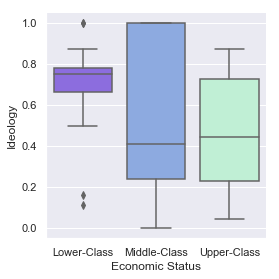

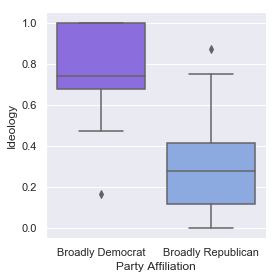

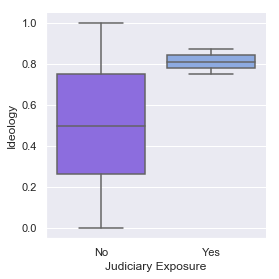

In [10]:
colors = ['#835AF1', '#7FA6EE', '#B8F7D4', '#393E46', '#2BCDC1', 
          '#F66095', '#A56CC1', '#A6ACEC', '#63F5EF']
jd_ideo = jd.dropna()

sns.axes_style('white') 
sns.set(font_scale = 1)
g = sns.catplot(x=jd_ideo.birth, y=jd_ideo.ideo, kind='box', 
                data=jd_ideo, palette=colors, height=10, aspect=1)
g.set_axis_labels("Birth Period", "Ideology")
# g.set(xticklabels=['1700-1749', '1750-1799', '1800-1849', 
#                 '1850-1899', '1900-1949','1950-1999'])
# plt.savefig('jd_birth_box.png')
plt.show()

sns.set(font_scale = 1)
g = sns.catplot(x=jd_ideo.famses, y=jd_ideo.ideo, kind='box', 
                data=jd_ideo, palette=colors, height=10, aspect=1)
g.set_axis_labels("Economic Status", "Ideology")
g.set(xticklabels=['Lower-Class', 'Middle-Class', 'Upper-Class'])
# plt.savefig('jd_famses_box.png')
plt.show()

sns.set(font_scale = 1)
g = sns.catplot(x=jd_ideo.parnom, y=jd_ideo.ideo, kind='box', 
                data=jd_ideo, palette=colors, height=10, aspect=1)
g.set_axis_labels("Party Affiliation", "Ideology")
g.set(xticklabels=['Broadly Democrat', 'Broadly Republican', 'Independent'])
# plt.savefig('jd_parnom_box.png')
plt.show()

sns.set(font_scale = 1)
g = sns.catplot(x=jd_ideo.famjud, y=jd_ideo.ideo, kind='box', 
                data=jd_ideo, palette=colors, height=10, aspect=1)
g.set_axis_labels("Judiciary Exposure", "Ideology")
g.set(xticklabels=['No', 'Yes'])
# plt.savefig('jd_famjud_box.png')
plt.show()

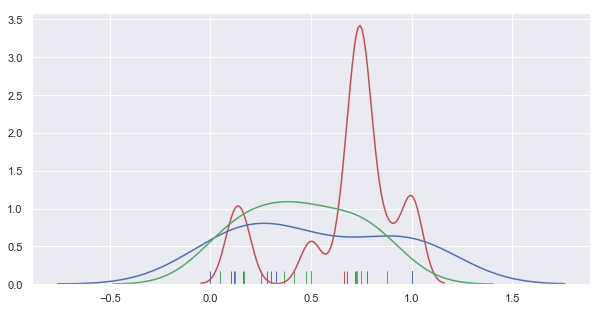

In [12]:
sns.set_style("white")

# Sort the dataframe by target
target_1 = jd_ideo.loc[jd_ideo['famses'] == 1]
target_2 = jd_ideo.loc[jd_ideo['famses'] == 2]
target_3 = jd_ideo.loc[jd_ideo['famses'] == 3]

sns.set(font_scale = 1)
sns.color_palette('muted')
f, ax = plt.subplots(figsize = (10, 5))

sns.distplot(target_1[['ideo']], color='r', hist=False, rug=True)
sns.distplot(target_2[['ideo']], color='b',hist=False, rug=True)
sns.distplot(target_3[['ideo']], color='g',hist=False, rug=True)

plt.show()

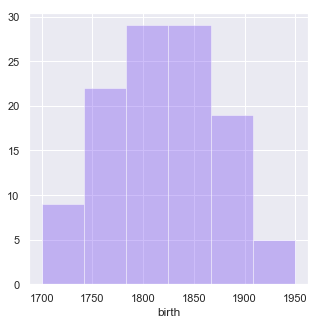

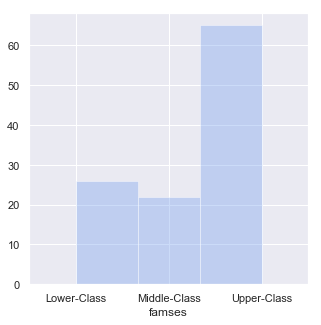

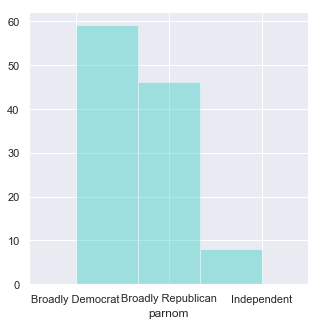

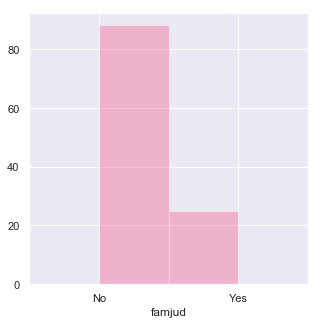

In [32]:
sns.axes_style(style="white") 
f, ax = plt.subplots(figsize = (5, 5))
sns.set(font_scale = 1)
g = sns.distplot(jd.birth, bins=6, kde=False, 
                 rug=False, color=colors[0])
# g.set(xlim=(0.5,6.5), xticks=[1,2,3,4,5,6])
# g.set(xticklabels=['1700-1749', '1750-1799', 
#         '1800-1849', '1850-1899', '1900-1949','1950-1999'])
# plt.savefig('jd_birth_dist.png')
plt.show()

f, ax = plt.subplots(figsize = (5, 5))
sns.set(font_scale = 1)
g = sns.distplot(jd.famses, bins=3, kde=False, 
                 rug=False, color=colors[1])
g.set(xlim=(0.5,3.5), xticks=[1,2,3])
g.set(xticklabels=['Lower-Class', 
                   'Middle-Class', 'Upper-Class'])
# plt.savefig('jd_famses_dist.png')
plt.show()

f, ax = plt.subplots(figsize = (5, 5))
sns.set(font_scale = 1)
g = sns.distplot(jd.parnom, bins=3, kde=False,
                 rug=False, color=colors[4])
g.set(xlim=(0.5,3.5), xticks=[1,2,3])
g.set(xticklabels=['Broadly Democrat', 
                   'Broadly Republican', 'Independent'])
# plt.savefig('jd_parnom_dist.png')
plt.show()

f, ax = plt.subplots(figsize = (5, 5))
sns.set(font_scale = 1)
g = sns.distplot(jd.famjud, bins=2, kde=False, rug=False, color=colors[5])
g.set(xlim=(0.5,2.5), xticks=[1,2])
g.set(xticklabels=['No', 'Yes'])
# plt.savefig('jd_famjud_dist.png')
plt.show()

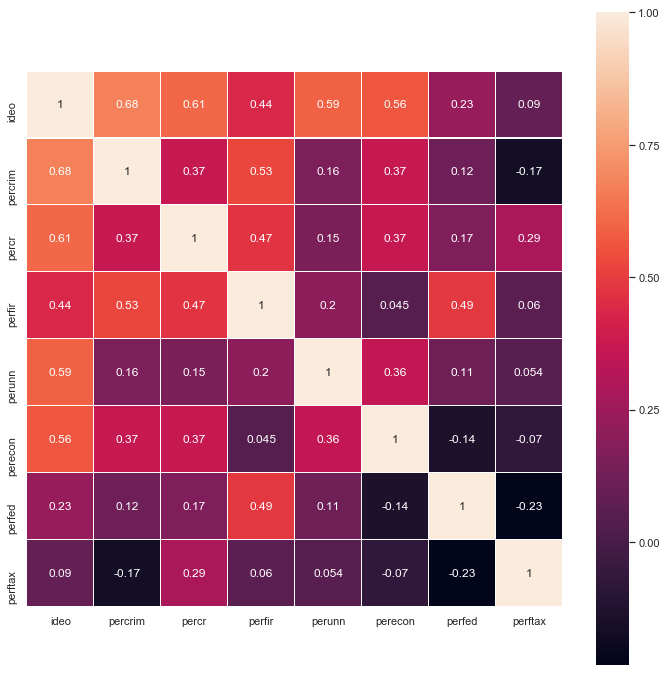

In [35]:
corr = jd.loc[:, jd_ideo+jd_votes].corr()

# Set up the matplotlib figure
sns.set(font_scale = 1)
f, ax = plt.subplots(figsize = (12, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, square = True, 
            linewidths = .5, ax = ax)
# plt.savefig('jd_heatmap.png')
plt.show()

## 2) Regression Analysis

In [37]:
base_model = smf.ols('ideo ~ C(birth)+C(race)+C(gender)', 
                     data=jd).fit()
print(base_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   ideo   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     3.230
Date:                Tue, 08 Jan 2019   Prob (F-statistic):             0.0238
Time:                        19:45:05   Log-Likelihood:                -4.6247
No. Observations:                  39   AIC:                             19.25
Df Residuals:                      34   BIC:                             27.57
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3269      0.048  

In [38]:
parnom_model = smf.ols('ideo ~ C(birth)+C(race)+C(gender)\
                        +C(famses)+C(famjud)+C(lawschn)', data=jd).fit()
print(parnom_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   ideo   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     2.598
Date:                Tue, 08 Jan 2019   Prob (F-statistic):             0.0275
Time:                        19:46:09   Log-Likelihood:               -0.64093
No. Observations:                  39   AIC:                             19.28
Df Residuals:                      30   BIC:                             34.25
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4276      0.078  

In [40]:
all_model = smf.ols('ideo ~ C(parnom)\
                    +C(birth)+C(race)+C(gender)\
                    +C(famses)+C(famjud)+C(lawschn)', data=jd).fit()
print(all_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   ideo   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     8.389
Date:                Tue, 08 Jan 2019   Prob (F-statistic):           4.87e-06
Time:                        19:46:58   Log-Likelihood:                 14.091
No. Observations:                  39   AIC:                            -8.183
Df Residuals:                      29   BIC:                             8.453
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.5678      0.060  